In [348]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

In [ ]:
#reduce file is the data with the 37 questions selected
reduced_file = "Resources/OSMI_2016_small_df.csv"
df = pd.read_csv(reduced_file)
df.head(1)

#### Consolidating Genders into 3 Categories (.replace())

In [527]:
#Reduces the gender column to 3 values: Male, Female, Other

df['What is your gender?'] = df['What is your gender?'].replace({
    'male': 'Male',
    'Male ': 'Male',
    'm': 'Male',
    'man': 'Male',
    'M2F': 'Male',
    'Cis male': 'Male',
    'Male.': 'Male',
    'Male (cis)': 'Male',
    'Man': 'Male',
    'Sex is male': 'Male',
    'cis male': 'Male',
    'Dude': 'Male',
    "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ":'Male',
    'mail': 'Male',
    'male ': 'Male',
    'Cis Male': 'Male',
    'cisdude': 'Male',
    'cis man': 'Male',
    'MALE': 'Male',
    'M': 'Male',
    'Malr': 'Male'
})

df['What is your gender?'] = df['What is your gender?'].replace({
    'F': 'Female',
    'female': 'Female',
    'F ': 'Female',
    'female ': 'Female',
    'Woman': 'Female',
    'fm': 'Female',
    'f': 'Female',
    'Cis female ': 'Female',
    'Female ': 'Female',
    'woman': 'Female',
    'Sex is Female': 'Female',
    'female/woman': 'Female',
    'Cisgender Female': 'Female',
    "fem":'Female',
    'Female (props for making this a freeform field, though)': 'Female',
    ' Female': 'Female',
    'Cis-woman': 'Female'
})

#temp variable to hold the gender column values
g = df['What is your gender?']

# changes what is not  Male or Female,  to `other`
for i in range(len(g)):
    if g[i] not in ['Male', 'Female']:
        df['What is your gender?'] = g.replace({g[i]: 'Other'})
        

In [529]:
# df['What is your gender?'].value_counts()

In [530]:
print('Column count: ', len(df.columns))

Column count:  37


In [60]:
# short_col is the dictionary with only the Question number (Example: Q1, Q2 ...)

short_cols = {
                    
       'Are you self-employed?': "Q1" ,
       'How many employees does your company or organization have?': "Q2",
       'Is your employer primarily a tech company/organization?': "Q3",
       'Is your primary role within your company related to tech/IT?': "Q4",
       'Does your employer provide mental health benefits as part of healthcare coverage?': "Q5",
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?':"Q6",
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?':"Q7",
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?': "Q8",
       'Do you think that discussing a mental health disorder with your employer would have negative consequences?': "Q9",
       'Would you feel comfortable discussing a mental health disorder with your coworkers?': "Q10",
       'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?': "Q11",
       'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?': "Q12",
       'Do you know local or online resources to seek help for a mental health disorder?': "Q13",
       'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?':"Q14",
       'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?': "Q15",
       'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?': "Q16",
       'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?': "Q17",
       'Did you feel that your previous employers took mental health as seriously as physical health?': "Q18",
       'Do you feel that being identified as a person with a mental health issue would hurt your career?': "Q19",
       'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?': "Q20",
       'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?':"Q21",
       'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?':"Q22" ,
    
        'Do you have a family history of mental illness?':"Q23",
       'Have you had a mental health disorder in the past?':"Q24",
       'Do you currently have a mental health disorder?':"Q25",
       'If yes, what condition(s) have you been diagnosed with?':"Q26",
       'Have you been diagnosed with a mental health condition by a medical professional?':"Q27",
       'If so, what condition(s) were you diagnosed with?':"Q28",
       'Have you ever sought treatment for a mental health issue from a mental health professional?':"Q29",
       'What is your age?':"Q30",
       'What is your gender?': "Q31",
       'What country do you live in?': "Q32",
       'What US state or territory do you live in?': "Q33",
       'What country do you work in?': "Q34",
       'What US state or territory do you work in?':"Q35",
       'Which of the following best describes your work position?':"Q36",
       'Do you work remotely?':"Q37"
                    
}

In [61]:
#create inverse dictionary with a dictionary comprehension
 #we use the inverse dictionary to display questions in our results
long_cols = {v: k for k, v in short_cols.items()}

In [ ]:
# long_cols is the dictionary with the question labels as the values
# - can be used to display only the labels in a dataframe
long_cols

In [64]:
# q_col_df is the dataframe with only the question number as the header (Example: Q1, Q2...)
q_cols_df = df.rename(columns= short_cols)

In [532]:
# raw df is the data frame with questions as columns
raw_df = df.rename(columns= long_cols)

In [533]:
# create a for loop to add the question number to the question label (Example: Q1- Are you self-employed?)
q_names_cols = {}
for i in range(0,len(df.columns)):
    q_names_cols[df.columns[i]] =   f"Q{i+1}- {df.columns[i]}"

In [534]:
# q_names_cols

In [535]:
# Create dataframe the the question name and question label 
q_names_df = df.rename(columns= q_names_cols)

## VARIABLES

In [115]:
self_employed_count = int(q_names_df[q_names_df['Q1- Are you self-employed?'] == 1][['Q1- Are you self-employed?']].count())
employed_count =int(q_names_df[q_names_df['Q1- Are you self-employed?'] == 0][['Q1- Are you self-employed?']].count())

total_survey_workers_count = int(employed_count + self_employed_count)
tech_workers_count = int(q_cols_df[q_cols_df['Q4'] == 1.0]['Q4'].count())
other_workers_count = int(total_survey_workers_count - tech_workers_count)


In [132]:
print(f"total_survey_workers_count: {total_survey_workers_count}")
print(f"tech_workers_count: {tech_workers_count}")
print(f"other_workers_count: {other_workers_count}")

total_survey_workers_count: 1433
tech_workers_count: 248
other_workers_count: 1185


In [76]:
# Count of tech + non tech workers based on answers to Q4[0.0 or 1.0]

print('Tech or not: ', q_cols_df[(q_cols_df['Q4'] == 0.0) | (q_cols_df['Q4'] == 1.0)]['Q4'].count())
print('Tech: ', q_cols_df[q_cols_df['Q4'] == 1.0]['Q4'].count() )
print('non Tech: ', q_cols_df[q_cols_df['Q4'] == 0.0]['Q4'].count() )

Tech or not:  263
Tech:  248
non Tech:  15


### Q4: Is Employee Role in tech? +  Cleanup answers to Q: [19,20,21,29]

In [133]:
# Q4: Is Employee Role in tech?
tech_workers_df = pd.DataFrame(q_cols_df[q_cols_df['Q4'] == 1.0])

tech_workers_df['Q4'] = tech_workers_df['Q4'].replace({1.0: "Yes"})

tech_workers_df['Q20'] = tech_workers_df['Q20'].replace({
    "Yes, I think they would": "Yes",
    "Yes, they do": "Yes",
    "No, I don't think they would": "No",
    "No, they do not": "No"
    })

tech_workers_df['Q21'] = tech_workers_df['Q21'].replace({
    "Maybe/Not sure": "Maybe",
    "Yes, I observed": "Yes",
    "Yes, I experienced": "Yes",
    })

tech_workers_df['Q19'] = tech_workers_df['Q19'].replace({
    "Yes, I think it would": "Yes",
    "Yes, it has": "Yes",
    "No, I don't think it would": "No",
    "No, it has not": "No"
    })

tech_workers_df['Q29'] = tech_workers_df['Q29'].replace({
    1: "Yes",
    0: "No"
    })

# tech_workers_df['Q19'].value_counts().index


In [134]:
# REDUCING TECH WORKERS DF TO RELEVANT COLUMNS
tech_workers_df = tech_workers_df[['Q31','Q4', 'Q27', 'Q29', 'Q23', 'Q24', 'Q25', 'Q8']]

In [540]:
tech_workers_df.head(2)

,Q31,Q4,Q27,Q29,Q23,Q24,Q25,Q8
4,Female,Yes,Yes,Yes,Yes,Yes,Yes,No
8,Female,Yes,Yes,Yes,Yes,Yes,Yes,I don't know


#### <span style="color:green">tech_workers grouped by 'Q31': Gender</span>

In [136]:
# Tech Workers  grouped by genders  =======================
tech_gender_group = tech_workers_df.groupby('Q31').count()['Q4']

## tech workers diagnosed by MH pro

In [148]:
# Count of Tech workers diagnosed by MH Professional =================================================
diagnosed_tech_workers = tech_workers_df[tech_workers_df['Q27'] == 'Yes'].groupby('Q31').count()['Q27']

In [541]:
diagnosed_tech_workers

## Summary Table: Tech Workers + Diagnosed Tech Workers

In [152]:
tech_and_diagnosed_df = pd.DataFrame({
    'Tech Workers Count': tech_gender_group,
    'Tech Workers %': round((tech_gender_group/tech_gender_group.sum()) * 100,1),
    'Diagnosed Tech Workers': diagnosed_tech_workers,
    'Diagnosed %': round((diagnosed_tech_workers/(tech_gender_group)) * 100,1),
    
})

In [153]:
tech_and_diagnosed_df.sort_values('Tech Workers Count', ascending=False, inplace=True)

In [542]:
tech_and_diagnosed_df

,Tech Workers Count,Tech Workers %,Diagnosed Tech Workers,Diagnosed %
Q31,,,,
Male,182,73.4,82,45.1
Female,60,24.2,40,66.7
Other,6,2.4,5,83.3


In [543]:
# TODO: From   tech_and_diagnosed_df Remove 'Tech Workers %' to get this result
tech_and_diagnosed_df[[tech_and_diagnosed_df.columns[0],tech_and_diagnosed_df.columns[2], tech_and_diagnosed_df.columns[3]] ]

,Tech Workers Count,Diagnosed Tech Workers,Diagnosed %
Q31,,,
Male,182,82,45.1
Female,60,40,66.7
Other,6,5,83.3


## BELEIVES_anonymity_sought_treatment_df

In [276]:
believes_anonymity = tech_workers_df[(tech_workers_df['Q27'] == 'Yes') & (tech_workers_df['Q8'] == 'Yes')].groupby('Q31').count()['Q8']
# believes_anonymity

In [232]:
believes_anonymity_sought_treatment = \
tech_workers_df[(tech_workers_df['Q27'] == 'Yes') & (tech_workers_df['Q8'] == 'Yes') & (tech_workers_df['Q29'] == 'Yes')].groupby('Q31').count()['Q29']

In [198]:
believes_anonymity_sought_treatment_df = pd.DataFrame({
    'Count': tech_gender_group,
    'Diagnosed': diagnosed_tech_workers,
    'Anonymity': believes_anonymity,
    'Anonymity & sought treatment': believes_anonymity_sought_treatment,
    'Anonymity & sought treatment %': round(believes_anonymity_sought_treatment/believes_anonymity*100,)
    
})

In [187]:
believes_anonymity_sought_treatment_df

,Count,Diagnosed,Anonymity,Anonymity & sought treatment,Anonymity & sought treatment %
Q31,,,,,
Female,60,40,10,9,90.0
Male,182,82,22,21,95.5
Other,6,5,2,2,100.0


## UNCERTAIN_anonymity_sought_treatment_df

In [280]:
uncertain_about_anonymity = \
tech_workers_df[(tech_workers_df['Q27'] == 'Yes') & (tech_workers_df['Q8'] == "I don't know")].groupby('Q31').count()['Q8']

In [281]:
uncertain_anonymity_sought_treatment = \
tech_workers_df[(tech_workers_df['Q27'] == 'Yes') & (tech_workers_df['Q8'] == "I don't know") & (tech_workers_df['Q29'] == 'Yes')].groupby('Q31').count()['Q29']


In [283]:
uncertain_anonymity_sought_treatment_df = pd.DataFrame({
    'Count': tech_gender_group,
    'Diagnosed': diagnosed_tech_workers,
    'Uncertain About Anonymity': uncertain_about_anonymity,
    'Uncertain Anonymity & sought treatment': uncertain_anonymity_sought_treatment,
    'Uncertain Anonymity & sought treatment %': round(uncertain_anonymity_sought_treatment/uncertain_about_anonymity*100,1)
    
})

In [284]:
uncertain_anonymity_sought_treatment_df.index.name = 'Gender'

In [544]:
uncertain_anonymity_sought_treatment_df

,Count,Diagnosed,Uncertain About Anonymity,Uncertain Anonymity & sought treatment,Uncertain Anonymity & sought treatment %
Gender,,,,,
Female,60,40,28,27,96.4
Male,182,82,58,53,91.4
Other,6,5,3,3,100.0


## gender_anonymity_summary_df

In [545]:
#TO DO: SUMMARY ABOUT ANONYMITY:

gender_anonymity_summary_df = pd.DataFrame({
   
    'Uncertain Anonymity & sought treatment %': round(uncertain_anonymity_sought_treatment/uncertain_about_anonymity*100,1),
    'Anonymity & sought treatment %': round(believes_anonymity_sought_treatment/believes_anonymity*100,)
    
})

In [254]:
#BY GENDER
gender_anonymity_summary_df.index.name = 'Gender'
gender_anonymity_summary_df

,Uncertain Anonymity & sought treatment %,Anonymity & sought treatment %
Gender,,
Female,96.4,90.0
Male,91.4,95.0
Other,100.0,100.0


In [546]:
# SUMMARY ANONYMITY Genderless:

genderless_anonymity_summary_df = pd.DataFrame({

        'Uncertain Anonymity & sought treatment %': [round(uncertain_anonymity_sought_treatment.sum()/uncertain_about_anonymity.sum()*100,1)],
    
        'Anonymity & sought treatment %': [round(believes_anonymity_sought_treatment.sum()/believes_anonymity.sum()*100,1)],
        
})

In [547]:
genderless_anonymity_summary_df.index.name = 'All Genders'
genderless_anonymity_summary_df

,Uncertain Anonymity & sought treatment %,Anonymity & sought treatment %
All Genders,,
0,93.3,94.1


# DOES THE BELIEVE IN HAVING ANONYMITY, INCREASE THE CHANCES OF WORKERS SEEKING TREATMENT?


In [325]:
genderless_anonymity_summary_df

,Uncertain Anonymity & sought treatment %,Anonymity & sought treatment %
0,93.3,94.1


# PLOTS: 

In [548]:
# Create an array that contains the number of users each language has
anonymity_perception = ['Uncertain', 'Certain']
x_axis = np.arange(len(anonymity_perception))
x_axis
anonymity_percentages = genderless_anonymity_summary_df.values[0]

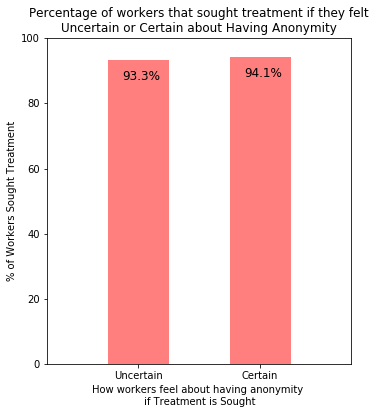

In [550]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)

ax.bar(
    x_axis, 
    anonymity_percentages,
    color='red',
    alpha=0.5, 
    align="center",
    width = 0.5 # the width of the bars 
)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, anonymity_perception)

ax.set_xlim(-0.75, len(x_axis)-0.25)

ax.set_ylim(0, 100)
ax.set_title("Percentage of workers that sought treatment if they felt\nUncertain or Certain about Having Anonymity")
ax.set_xlabel("How workers feel about having anonymity \nif Treatment is Sought")
ax.set_ylabel("% of Workers Sought Treatment")

# # set individual bar lables
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-6, \
            str(round((i.get_height()), 2))+'%', fontsize=12,
                color='black')
    
fig.savefig('Figures/anonymity_black.png')
plt.savefig('Figures/anonymity_black.svg', format='svg', dpi=1500,bbox_inches = 'tight')


#### TESTING CALCULATIONS

In [132]:
#DIAGNOSED
diagnosed_count = tech_workers_df[(tech_workers_df['Q27'] == 'Yes')]['Q27'].count()
diagnosed_count

127

In [133]:
#DIAGNOSED AND SOUGHT TREATMENT
diagnosed_sought_treamtment_count = tech_workers_df[(tech_workers_df['Q27'] == 'Yes') & (tech_workers_df['Q29'] == "Yes")]['Q29'].count()
diagnosed_sought_treamtment_count

118

In [160]:
#OF THOSE DIAGNOSED, WHAT PERCENTAGE SOUGHT TREATMENT?
diangonsed_sought_treatment_percent = diagnosed_sought_treamtment_count/diagnosed_count
round(diangonsed_sought_treatment_percent*100,1)

92.9

In [152]:
# OF THOSE DIAGNOSED, HOW MANY BELIEVE WILL HAVE ANONYMITY IF THEY SEEK TREATMENT? 
diagnosed_anonymity_count = tech_workers_df[(tech_workers_df['Q27'] == 'Yes') & (tech_workers_df['Q8'] == "Yes")]['Q8'].count()
diagnosed_anonymity_count

34

In [153]:
# OF THOSE DIAGNOSED WHO BELIVE WILL HAVE ANONYMITY,  HOW MANY SOUGHT TREATMENT?
diagnosed_anonymity_sought_treamtment_count = tech_workers_df[(tech_workers_df['Q27'] == 'Yes')& (tech_workers_df['Q8'] == "Yes") & (tech_workers_df['Q29'] == "Yes")]['Q29'].count()
diagnosed_anonymity_sought_treamtment_count


32

In [157]:
#OF THOSE DIAGNOSED THAT BELIEVE WILL HAVE ANONYMITY, WHAT PERCENTAGE SOUGHT TREATMENT?

diagnosed_anonymity_sought_treamtment_percent = diagnosed_anonymity_sought_treamtment_count / diagnosed_anonymity_count
round(diagnosed_anonymity_sought_treamtment_percent * 100, 1)

94.1

In [161]:
# DIAGNOSED BELIEVES NO ANONYMITY
tech_workers_df[(tech_workers_df['Q27'] == 'Yes') & (tech_workers_df['Q8'] == "No")].count()['Q8']  #['Q27']


4

In [162]:
# DIAGNOSED BELIEVES NO ANONYMITY SOUGHT TREATMENT
tech_workers_df[(tech_workers_df['Q27'] == 'Yes') & (tech_workers_df['Q8'] == "No") & (tech_workers_df['Q29'] == 'Yes') ].count()['Q8']  #['Q27']


3

In [176]:
# DIAGNOSED DOES NOT KNOW IF WILL HAVE ANONYMITY
dianosed_notsure_anonymity = tech_workers_df[(tech_workers_df['Q27'] == 'Yes') & (tech_workers_df['Q8'] == "I don't know")]['Q8'].count()
dianosed_notsure_anonymity

89

In [292]:
# DIAGNOSED DOES NOT KNOW IF WILL HAVE ANONYMITY AND SOUGHT TREATMENT
dianosed_notsure_if_anonymity_sought_treatment = \
tech_workers_df[(tech_workers_df['Q27'] == 'Yes') & (tech_workers_df['Q8'] == "I don't know") & (tech_workers_df['Q29'] == 'Yes') ]['Q29'].count()

dianosed_notsure_if_anonymity_sought_treatment

83

In [294]:
# OF THOSE DIAGNOSED THAT ARE NOT  SURE IF WILL HAVE ANONYMITY, WHAT PERCENTAGE SOUGHT TREATMENT
dianosed_notsure_if_anonymity_sought_treatment_percent =  dianosed_notsure_anonymity_sought_treatment / dianosed_notsure_anonymity
round(dianosed_notsure_if_anonymity_sought_treatment_percent * 100 ,2)

In [171]:
tech_workers_df['Q8'].value_counts().sum()

248

In [163]:
tech_workers_df['Q8'].value_counts()

I don't know    163
Yes              71
No               14
Name: Q8, dtype: int64

In [184]:
# Tech Workers that sought treatment wether or not they were diagnosed

tech_workers_df['Q29'].value_counts()

Yes    143
No     105
Name: Q29, dtype: int64

In [185]:
# Tech Workers that sought treatment wether or not they were diagnosed percentage

143/248

0.5766129032258065